# COMP 7150 Assignment 4

**Deadline**: April 1, 2024. Before midnight (12AM)


YOUR NAME: Hasan Mashrique

---

**Reading**
* Notebooks 8, 11: standardization of data
* Notebook 9: how to use KMeans clustering
* Notebook 10: how to use PCA
* Notebook 12: Application of PCA

In this assignment, you will use the abalone dataset.

To answer questions, please substantiate your answers with reasoning, explanation, and code.  

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn
%matplotlib inline

In [3]:
import pandas
abalone = pandas.read_csv('../Datasets/abalone.csv')
abalone.sample(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
424,I,0.260,0.200,0.070,0.0920,0.037,0.0200,0.030,6
2967,M,0.680,0.515,0.160,1.2345,0.618,0.2625,0.325,11
2401,F,0.585,0.415,0.155,0.6985,0.300,0.1460,0.195,12


---
## **Problem 1**

Define a Python function named `evaluate_kmean`, which has these parameters:
* X - the features provided to KMeans
* k - the number of clusters (`n_cluster`) provided to KMeans
* random_state - the random state provided to KMeans

This function should build a KMeans model on the features and return the silhouette score of the resulting clustering.  Note: use the same features to predict and score the clustering.

## Solution 1:

For this problem, the function `evaluate_kmean` is defined below with the given parameters.

In [4]:
'''
function: evaluate_kmean()
parameters:
     X: the features provided to KMeans
     k: the number of clusters (`n_cluster`) provided to KMeans
     rand_state: the random state provided to KMeans

return_value: silhouette score of kmeans clustering

'''
def evaluate_kmean(X, k, rand_state):
    
    model= KMeans(n_clusters=k, random_state=rand_state)
    model.fit(X)    
    
    sil_score = silhouette_score(X, model.labels_, metric='euclidean')
    
    return sil_score



---
## **Problem 2**

Compare the performance of KMeans on abalone dataset on these three features:
* all variables in the abalone dataset.  Note: you might need to process the categorical variable(s).
* all variables in the abalaone dataset, standardized.
* all variables in the abalaone dataset, normalized.

The comparison should be done on various values on k (the number of clusters) ranging from 2 to 30.  

Report and describe your finding.  Which of the 3 features give the best clustering score, and what is the best number of clusters used for clustering?

## Solution 2:

- For this problem, first we convert the data into the normalized and standardized version. We also convert the categorical variables.

In [5]:
abalone.sample(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3577,M,0.60,0.475,0.230,1.1570,0.5220,0.2235,0.360,11
1799,M,0.60,0.465,0.165,1.0380,0.4975,0.2205,0.251,9
510,I,0.68,0.530,0.185,1.1095,0.4390,0.2450,0.340,10


In [6]:
# converting the categorical variables

abalone = pandas.get_dummies(abalone)


In [7]:
abalone.sample(4)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
430,0.570,0.450,0.175,0.9555,0.3800,0.1665,0.2950,18,1,0,0
993,0.580,0.455,0.150,1.0120,0.4985,0.2115,0.2835,10,0,0,1
2327,0.475,0.395,0.135,0.5920,0.2465,0.1645,0.2000,13,0,0,1
640,0.325,0.240,0.085,0.1730,0.0795,0.0380,0.0500,7,0,0,1


In [8]:
len(abalone)

4177

In [9]:
features= abalone

In [10]:
# converting the features to normalized version

normalized_abalone = pandas.DataFrame(
    MinMaxScaler().fit_transform(features).round(4),
    columns = features.columns
)

normalized_abalone.sample(3)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
906,0.3378,0.3109,0.0664,0.0655,0.0548,0.0579,0.0483,0.1786,0.0,1.0,0.0
3652,0.6081,0.6218,0.1239,0.3087,0.2821,0.2390,0.2202,0.3214,1.0,0.0,0.0
2656,0.6351,0.6134,0.1062,0.2778,0.2703,0.2429,0.1679,0.2143,0.0,0.0,1.0


In [11]:
# converting the features to standardized version

standardized_abalone = pandas.DataFrame(
    StandardScaler().fit_transform(features).round(4),
    columns = features.columns
)

standardized_abalone.sample(3)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
1723,1.0910,0.9787,1.2071,1.0600,1.0550,0.8568,1.3376,0.6410,1.4818,-0.6880,-0.7595
1848,-0.4080,-0.6841,-0.8253,-0.7653,-0.7046,-0.9178,-0.6634,-0.2896,-0.6748,1.4535,-0.7595
223,-0.6578,-0.5329,0.2507,-0.7010,-0.8037,-0.5072,-0.6023,0.3308,1.4818,-0.6880,-0.7595


## Cluster Analysis for different data formation:

After converting the features into normalized and standardized, we now have 3 versions of the data.
Now, we use the function in solution 1 and evaluate the silhoutte score for these 3 types of data.
We do this process for 2 to 30 clusters. The clustering scores(silhoutte score) are reported below for different cluster numbers and feature type.

In [12]:
regular_score=[]
normalized_score=[]
standardized_score=[]

for i in range(2,31):
    
    regular_ans=evaluate_kmean(abalone, i, 2024)
    regular_score.append(regular_ans)
    
    normalized_ans=evaluate_kmean(normalized_abalone, i, 2024)
    normalized_score.append(normalized_ans)
    
    standardized_ans=evaluate_kmean(standardized_abalone, i, 2024)
    standardized_score.append(standardized_ans)
    
    #print(f" for cluster {i}: Regular Score:{regular_ans} , normalized score: {normalized_ans} , standardized score: {standardized_ans}")

clusters= pandas.DataFrame({'regular_score': regular_score, 
                            'normalized_score': normalized_score, 
                            'standardized_score': standardized_score}) 

clusters.set_index(pandas.Index(range(2, 31)), inplace=True)

clusters

,regular_score,normalized_score,standardized_score
2,0.527621,0.507573,0.385307
3,0.446426,0.732103,0.284524
4,0.407519,0.627467,0.341456
5,0.378306,0.536564,0.350105
6,0.357580,0.451534,0.362148
7,0.348655,0.437008,0.375989
8,0.353640,0.419734,0.362164
9,0.341570,0.406031,0.348923
10,0.377727,0.382949,0.333848
11,0.415043,0.365964,0.346326


### Analysis:

- for regular given feature, as clusters increase, the silhoutte score tends to improve.
- for normalized features, as clusters increase, the silhoutte score tends to decrease.
- for standardized features, as clusters increase, the silhoutte score tends to decrease as well.

Now we find the highest clustering score and its corresponding cluster number for the different data versions.

In [13]:
# test=max(clusters['regular_score'])
# clusters.iloc(test)
print("Silhoutte scores Analysis for different clusters: \n")
    
print("regular clusters: ", max(clusters['regular_score']),clusters[clusters['regular_score']==max(clusters['regular_score'])].index.values)
print("normalized clusters: ", max(clusters['normalized_score']),clusters[clusters['normalized_score']==max(clusters['normalized_score'])].index.values)
print("standardized clusters: ", max(clusters['standardized_score']),clusters[clusters['standardized_score']==max(clusters['standardized_score'])].index.values)    
    

Silhoutte scores Analysis for different clusters: 

regular clusters:  0.5443162878222592 [30]
normalized clusters:  0.7321034964852111 [3]
standardized clusters:  0.3853065586100005 [2]


---
## **Problem 3**

Following the previous problem, select the best value of k (one that gives the highest silhouette score).

Define a Python function named `evaluate_kmean_with_pca`, which has these parameters:
* X - the features provided to KMeans
* n - the number of principal components (`n_components`) provided to PCA
* random_state - the random state provided to KMeans

The function will transform the features X, using PCA.  It will create a KMeans model, with the optimal number of clusters found in the previous problem. Then, use the model to fit the transformed features, make predictions using the transformed features, and calculate the silhouette score of the resulting clustering.


## Solution 3:

The function `evaluate_kmean_with_pca()` is defined below with the following parameters.

In [14]:
'''
function: evaluate_kmean_with_pca()
parameters:
     X: the features provided to KMeans
     n: the number of principal components (`n_components`) provided to PCA
     rand_stat: the random state provided to KMeans
     no_cluster: the number of clusters

return_value: silhouette score of kmeans clustering for pca converted data

'''


def evaluate_kmean_with_pca(X, n, rand_stat, no_cluster):
    
    pca = PCA(n_components=n)
    converted_pca = pandas.DataFrame(pca.fit_transform(X))
    
    pca_model = KMeans(n_clusters= no_cluster, random_state=rand_stat)
    pca_model.fit(converted_pca)    
    
    sil_score = silhouette_score(converted_pca, pca_model.labels_, metric='euclidean')
    
    return sil_score

    

---
## **Problem 4**

Identify the number of components (`n_components`) that gives the highest score, with each of these three features:
* all variables in the abalone dataset.  Note: you might need to process the categorical variable(s).
* all variables in the abalaone dataset, standardized.
* all variables in the abalaone dataset, normalized.

Report your finding.


## Solution 4:

For the pca converted data, we do clustering for the optimal cluster number found in solution 2. We also do the clustering for number of n_components(2-10) to find the best n_components based on silhouette score. 

The results are reported below:

In [15]:
regular_pca_score=[]
normalized_pca_score=[]
standardized_pca_score=[]

for i in range(2,11):
    regular_pca=evaluate_kmean_with_pca(abalone, i, 2024, 30)
    regular_pca_score.append(regular_pca)

    normalized_pca=evaluate_kmean_with_pca(normalized_abalone, i, 2024, 3)
    normalized_pca_score.append(normalized_pca)
    
    standardized_pca=evaluate_kmean_with_pca(standardized_abalone, i, 2024, 2)
    standardized_pca_score.append(standardized_pca)
    
    #print(f" for cluster {i}: Regular Score:{regular_ans} , normalized score: {normalized_ans} , standardized score: {standardized_ans}")

pca_clusters= pandas.DataFrame({'regular_pca_score': regular_pca_score, 
                            'normalized_pca_score': normalized_pca_score, 
                            'standardized_pca_score': standardized_pca_score}) 

pca_clusters.set_index(pandas.Index(range(2, 11)), inplace=True)

pca_clusters

,regular_pca_score,normalized_pca_score,standardized_pca_score
2,0.624687,0.888421,0.473260
3,0.662270,0.767628,0.435262
4,0.567118,0.746547,0.405985
5,0.552113,0.739806,0.398760
6,0.543278,0.736570,0.392811
7,0.539746,0.733766,0.389212
8,0.540322,0.733165,0.386235
9,0.544757,0.732416,0.385581
10,0.544316,0.732103,0.385307


In [16]:
print("regular pca: ", max(pca_clusters['regular_pca_score']),"n_components: ", pca_clusters[pca_clusters['regular_pca_score']==max(pca_clusters['regular_pca_score'])].index.values)
print("normalized pca: ", max(pca_clusters['normalized_pca_score']),"n_components: ", pca_clusters[pca_clusters['normalized_pca_score']==max(pca_clusters['normalized_pca_score'])].index.values)
print("standardized pca: ", max(pca_clusters['standardized_pca_score']),"n_components: ", pca_clusters[pca_clusters['standardized_pca_score']==max(pca_clusters['standardized_pca_score'])].index.values)    
    

regular pca:  0.6622702655801369 n_components:  [3]
normalized pca:  0.8884205671595254 n_components:  [2]
standardized pca:  0.4732601806430458 n_components:  [2]


From this analysis , for the best cluster numbers, we see that `normalized` pca features gives the best clustering score.

---
**Problem 5**

At this point, you have a good idea if the original features (X), or the standardized features, or the normalized features resulted in the best clustering performance.

Use these features to identify the best combination of the number of clusters (k) and the number of principal components (n) used to cluster.

Define a Python function called `evaluate`, with these parameters:
* X - the features provided to KMeans
* n - the number of principal components (`n_components`) provided to PCA
* k - the number of clusters (`n_cluster`) provided to KMeans
* random_state - the random state provided to KMeans

Use this function to identify the values of `k` and `n` that gives the highest clustering (silhouette) score.

## Solution 5:

For this problem, the function is `evaluate()` is written with the following parameters.

In [17]:
'''
function: evaluate()
parameters:
      X: the features provided to KMeans
      n: the number of principal components (`n_components`) provided to PCA
      k: the number of clusters (`n_cluster`) provided to KMeans
      rand_stat: the random state provided to KMeans
return_value: silhouette score of kmeans clustering for pca converted data

'''

def evaluate(X,n,k,rand_stat):
    
    #normalized_pca=evaluate_kmean_with_pca(normalized_abalone, , 2024, 3)
    #normalized_pca_score.append(normalized_pca)
    
    pca = PCA(n_components=n)
    converted_pca = pandas.DataFrame(pca.fit_transform(X))
    
    pca_opt = KMeans(n_clusters= k, random_state=rand_stat)
    pca_opt.fit(converted_pca)    
    
    sil_score = silhouette_score(converted_pca, pca_opt.labels_, metric='euclidean')
    
    return sil_score
    

From this function defined above, we try to find the best combination of `k` and `n` which gives the best silhouette score. We store the `k` and `n` for the best clustering score. 

For data, we use the the normalized features since it resulted in the best clustering performance(solution 4).

In [18]:
best_cluster=[]
best_components=[]
max_sil=0

for clust in range(2,30):
    for comp in range(2,11):
        sil_val= round(evaluate(normalized_abalone, comp, clust, 2024),6)
        
        if sil_val>max_sil:
            max_sil= sil_val
            best_cluster.append(clust)
            best_components.append(comp)
        


print("best cluster: ", best_cluster.pop(),"best components: ", best_components.pop(),"max silhouette score: ", max_sil)

best cluster:  3 best components:  2 max silhouette score:  0.888421


From the analysis, we can see that the normalized converted pca features with clusters= 3 and n_components= 2 gives the best clustering score.

---
## **Problem 6**

Continuing from problem 5, where you for the values of `k` and `n` with the highest score.

Which feature(s) does the first principal component correlate to the most? Which feature(s) does the second principal component correlate to the most?

## Solution 6:

Since the normalized features give the best clustering performance, we try to see which pca features correspond to the actual features in the abalone dataset. 

We look at the variance of the transformed features and see how much information it contains.

In [19]:
pca = PCA()
converted_pca = pandas.DataFrame(pca.fit_transform(normalized_abalone))

converted_pca.sample(3)

,0,1,2,3,4,5,6,7,8,9,10
247,0.954540,-0.147636,-0.073363,0.064583,0.026143,-0.012224,0.001348,-0.005339,0.005188,0.001038,6.970969e-17
3667,-0.273046,0.807261,-0.077182,-0.001823,0.026512,0.018140,0.005341,-0.013771,-0.046191,0.004501,-6.791988e-17
2677,-0.296345,0.813657,-0.023508,-0.099798,-0.056387,-0.064102,0.008925,0.010795,-0.007411,0.003537,7.629919e-17


In [20]:
converted_pca.var()

0     3.918716e-01
1     3.367227e-01
2     7.994509e-02
3     9.682940e-03
4     4.404186e-03
5     1.650198e-03
6     1.347478e-03
7     3.783430e-04
8     3.378928e-04
9     1.721206e-04
10    5.386004e-33
dtype: float64

From the variance, we can see the first 2 (0 and 1) pca features gives us the highest variance of all the features. Now, lets try to find out which of the actual features in the abalone dataset orrespond to the pca features . For this, we do a pearson correlation analysis to see correlations with actual features and pca features.

In [21]:
from scipy.stats import pearsonr

In [22]:
for i in range(11):
    for f in normalized_abalone:
        r, pvalue = pearsonr(normalized_abalone[f], converted_pca[i])
        print(i, f, round(r,2))
    print()

0 Length -0.69
0 Diameter -0.7
0 Height -0.63
0 Whole weight -0.7
0 Shucked weight -0.67
0 Viscera weight -0.69
0 Shell weight -0.69
0 Rings -0.5
0 Sex_F -0.31
0 Sex_I 0.96
0 Sex_M -0.64

1 Length 0.2
1 Diameter 0.2
1 Height 0.19
1 Whole weight 0.18
1 Shucked weight 0.15
1 Viscera weight 0.19
1 Shell weight 0.19
1 Rings 0.15
1 Sex_F 0.94
1 Sex_I -0.15
1 Sex_M -0.76

2 Length 0.65
2 Diameter 0.64
2 Height 0.53
2 Whole weight 0.67
2 Shucked weight 0.66
2 Viscera weight 0.64
2 Shell weight 0.64
2 Rings 0.3
2 Sex_F -0.13
2 Sex_I 0.22
2 Sex_M -0.09

3 Length 0.01
3 Diameter 0.04
3 Height 0.09
3 Whole weight -0.06
3 Shucked weight -0.21
3 Viscera weight -0.1
3 Shell weight 0.1
3 Rings 0.78
3 Sex_F -0.0
3 Sex_I 0.01
3 Sex_M -0.0

4 Length -0.23
4 Diameter -0.22
4 Height -0.05
4 Whole weight 0.13
4 Shucked weight 0.1
4 Viscera weight 0.13
4 Shell weight 0.13
4 Rings 0.1
4 Sex_F 0.0
4 Sex_I 0.0
4 Sex_M -0.0

5 Length -0.01
5 Diameter 0.01
5 Height 0.04
5 Whole weight 0.01
5 Shucked weight -0.12


From the correlation analysis, we can see that the actual feature `Sex_I` correlate with pca 0(first principle component) the most and the actual feature `Sex_F` correlate with pca 1(second principle component) the most. 

---
## **Problem 7**

Continuing from problem 5, where you for the values of `k` and `n` with the highest score, what do the clusters represent?

## Solution 7

From solution 5 , we got our  result as,
`best cluster:  3 best components:  2 max silhouette score:  0.888421`.

Lets cluster using KMeans clustering model with the best cluster number and see what we can see.

In [23]:
abalone.sample()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
2590,0.58,0.445,0.145,0.888,0.41,0.1815,0.2425,8,1,0,0


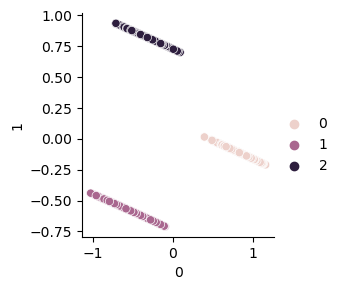

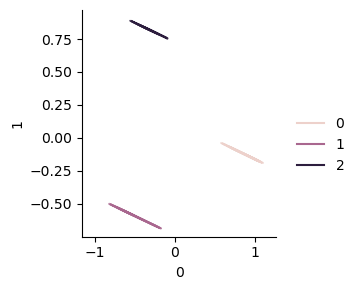

In [24]:

model = KMeans(n_clusters=3, random_state=2024)
model.fit(converted_pca)

seaborn.relplot(data=converted_pca, x=0, y=1, hue=model.labels_, height=3)
seaborn.displot(data=converted_pca, x=0, y=1, hue=model.labels_, kind='kde', height=3)

From the relplot and displot above , we can see we have 3 clusters which are quite distinct. The clustering was done using the pca converted features. 

From our pca correlation analysis in problem 6, we have seen the 2 most varied principal components are related with Sex. 
So , we can predict from the cluster visualization that these 3 clusters are most likely clustered based on `Sex`.
These clusters are most likely representing the `Sex` feature.